In [33]:
import os
import time


from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import Select
import pyautogui

In [5]:
certificate_password = os.getenv("CERTIFICATE_PASSWORD")
driver_path = os.getenv("DRIVER_PATH")

### <a id="btn_certLogin" class="w2anchor2 " href="javascript:void(null);">공인인증서로그인</a>

In [61]:
options = Options()
# chrome user agent를 지정해주기
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.113 Safari/537.36")

#     "download.default_directory" : // String which specifies where to download files to by default.
#     "download.prompt_for_download" : // Boolean which specifies whether we should ask the user if we should download // a file (true) or just download it automatically.
#     "download.directory_upgrade" : // Boolean that records if the download directory was changed by an // upgrade a unsafe location to a safe location.
#     "safebrowsing.enabled" : 

options.add_experimental_option('prefs', {
    "download.default_directory": 'C:\\dev\\files',
    "download.prompt_for_download": False,
    "download.directory_upgrade": True,
    "safebrowsing.enabled": True
})

driver = webdriver.Chrome(driver_path, options=options)
driver.implicitly_wait(10)
driver.maximize_window()


<tr id="id=cn%3DyessignCA%20Class%202%2Cou%3DAccreditedCA%2Co%3Dyessign%2Cc%3Dkr&amp;sn=24%3A36%3A18%3A41%3A" class="data active"><td><span class="ico cert1">정상</span><span>은행/신용카드/보험(개인) - 신한은행</span></td><td><a href="javascript:void(null);"><span>오지환()</span></a></td><td><a href="javascript:void(null);"><span>2019-10-23</span></a></td><td><a href="javascript:void(null);"><span>금융결제원</span></a></td></tr>

### <input type="password" title="password" id="INI_userPw" name="INI_userPw" autocomplete="off" placeholder="인증서 암호는 대소문자를 구분합니다." data-enc="on" tk_security="true">

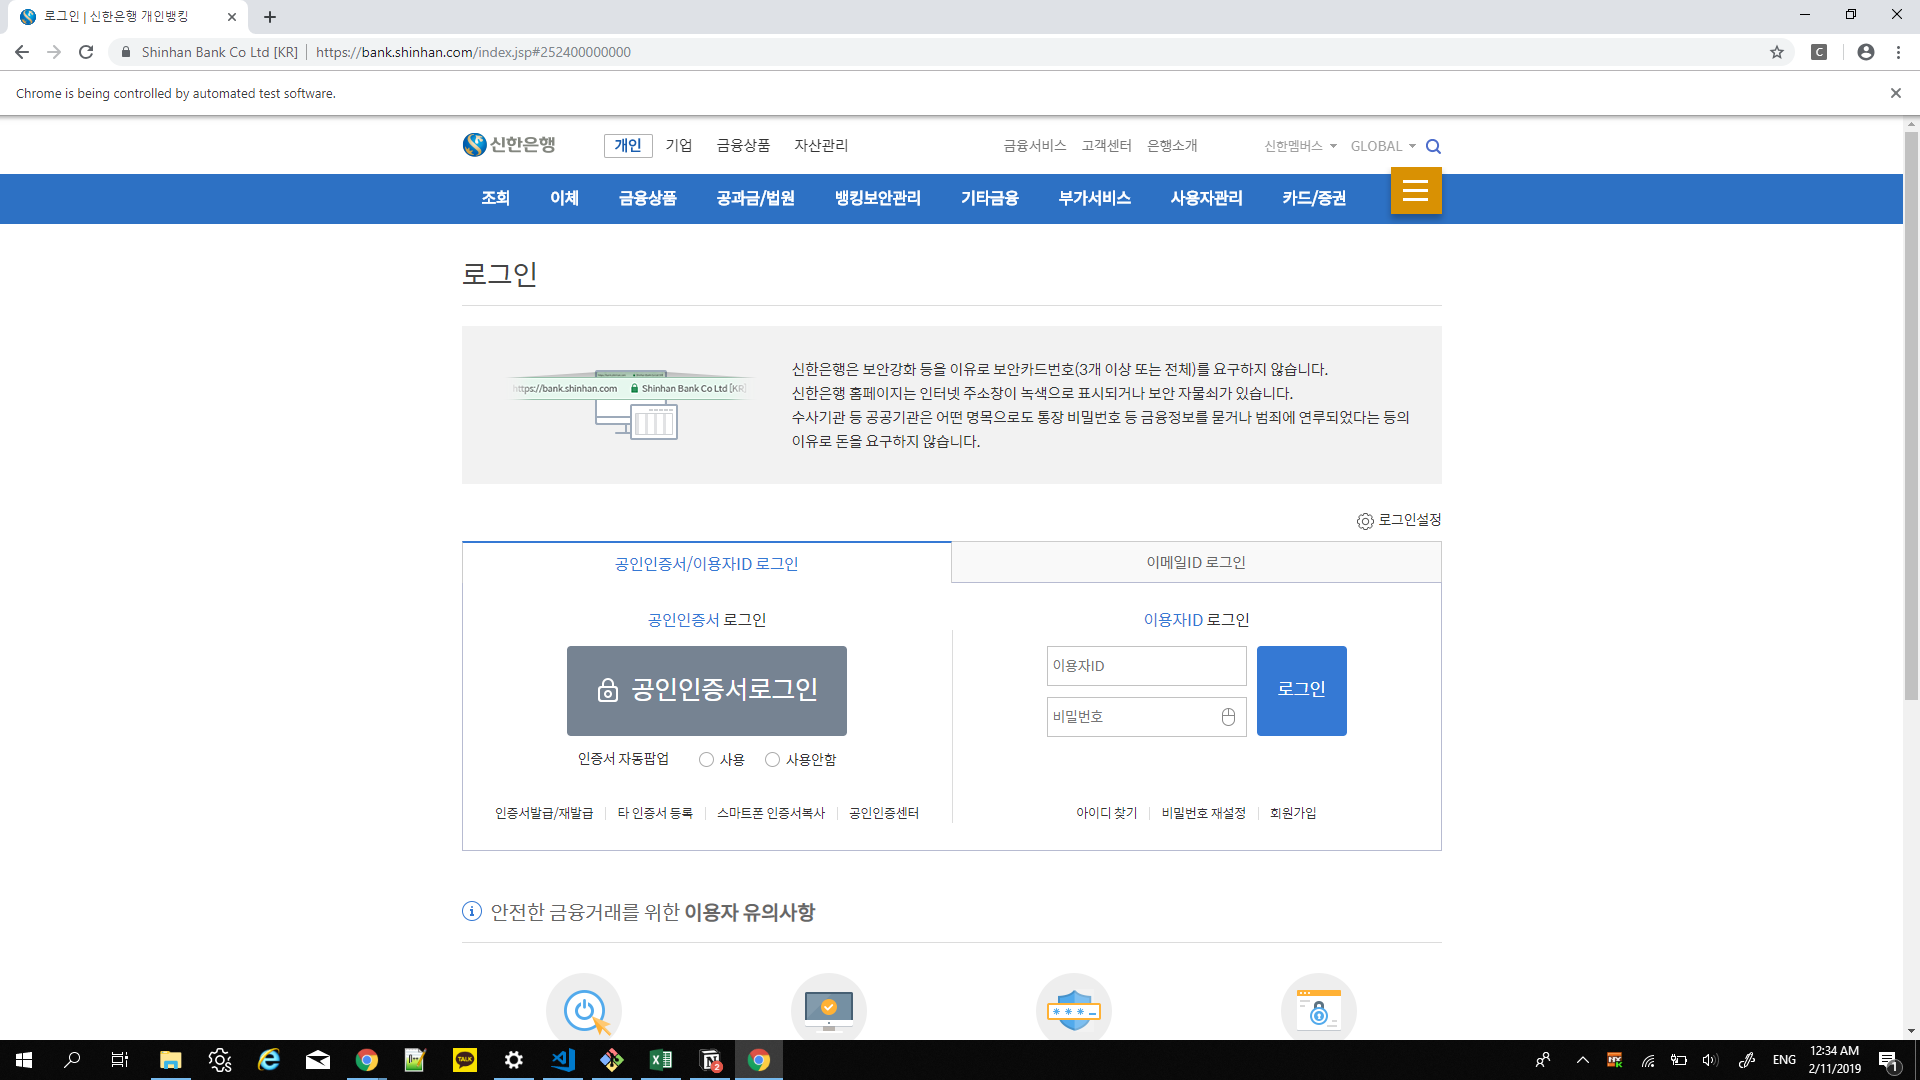

In [62]:
driver.get("https://bank.shinhan.com/index.jsp#252400000000") #신한은행 로그인 화면
button_for_certificate = driver.find_element_by_xpath("//a[@id='btn_certLogin']")
time.sleep(4)
button_for_certificate.click()

# 공인인증서를 위한 sleep 3초 
pyautogui.screenshot('shinhan/current.png')

### 인증서 로그인

#### 인증서선택

In [63]:
certificate_tag = driver.find_element_by_xpath("//tr[descendant::span[contains(text(), '오지환')]]") # 이 정보는 있어야함.
certificate_tag.click()
input_certificate = driver.find_element_by_xpath("//input[@id='INI_userPw']")
input_certificate.click()
time.sleep(1)
pyautogui.typewrite(certificate_password)

In [64]:
button_for_click = driver.find_element_by_xpath("//button[text()='확인'][@id='INI_certSubmit']")
button_for_click.click()

### <a id="wq_uuid_203" class="w2group" href="javascript:void(null);"><span id="wq_uuid_204" class="w2span ">조회</span></a>

In [65]:
inquiry_account_info = driver.find_element_by_xpath("//a[contains(@href,'javascript:shbObj.IB00000RF01.fncShowGridClick')][text()='조회'][1]")
inquiry_account_info.click()

In [66]:
selector_for_inquiry = driver.find_element_by_xpath("//select[@title='조회계좌번호']")
selector_for_inquiry = Select(selector_for_inquiry)
selector_for_inquiry.options[0].get_attribute('value')

'110-332-717310 [신한 주거래 우대통장(저…]'

In [74]:
inquiry_duration_from = driver.find_element_by_xpath("//input[@id='wfr_searchCalendar_ica_fr_input']")
inquiry_duration_to = driver.find_element_by_xpath("//input[@id='wfr_searchCalendar_ica_to_input']")
inquiry_button = driver.find_element_by_xpath("//a[@id='btn_inquiry']")
download_popup_button = driver.find_element_by_xpath("//a[@id='wfr_grd_inq_btngrp_div_btn_downFile']")

inquiry_duration_from.send_keys("20181001")
inquiry_duration_to.send_keys("20190210")
inquiry_button.click()
time.sleep(3)
download_popup_button.click()

In [97]:
iframe = driver.find_element_by_xpath("//iframe[@title='파일저장 프레임']")
driver.switch_to.frame(iframe)
checkbox_for_download = driver.find_element_by_xpath("//input[@id='cbx_columnAll_input_0']")
excel_download_button = driver.find_element_by_xpath("//a[@id='btn_saveXls'][text()='엑셀저장']")
checkbox_for_download.click()
excel_download_button.click()                                                 

<select class="w2selectbox_native_select" id="sbx_accno_input_0" title="조회계좌번호"><option>110-332-717310 [신한 주거래 우대통장(저…]</option><option>223-073-782806 [마이홈플랜 주택청약 종합…]</option></select>
<input id="wfr_searchCalendar_ica_fr_input" name="wfr_searchCalendar_ica_fr_input" class="w2inputCalendar_divInput" title="시작일자" style="width: 88px; height: 28px;">
<input id="wfr_searchCalendar_ica_to_input" name="wfr_searchCalendar_ica_to_input" class="w2inputCalendar_divInput" title="종료일자" style="width: 88px; height: 28px;">
<a id="btn_inquiry" class="w2anchor2 btnTySky01 large" href="javascript:void(null);">조회</a>
<a id="wfr_grd_inq_btngrp_div_btn_downFile" style="visibility: visible;" class="w2anchor2 " href="javascript:void(null);" aria-hidden="false">파일저장</a>
<input type="checkbox" class="w2checkbox_input" name="cbx_columnAll_input" index="0" id="cbx_columnAll_input_0">
<a id="btn_saveXls" class="w2anchor2 btnTyBlue01 large" href="javascript:void(null);">엑셀저장</a>

In [ ]:
<iframe id="CO00012RP_1549812017552_iframe" src="/websquare/../comjsp/popup.jsp?language=ko&amp;w2xPath=/rib/include/popup/CO00012RP.xml&amp;popupID=CO00012RP_1549812017552&amp;idx=idx10_15498120175547322.852398491282&amp;w2xHome=/rib/banking/IB01/&amp;w2xDocumentRoot=" class="w2iframe w2window_iframe" frameborder="0" title="파일저장 프레임" name="CO00012RP_1549812017552_iframe"></iframe>

In [ ]:
//*[@id="cbx_columnAll_input_0"]